## Spatial Thinking with Python 

Working with Vector and raster data

## GDAL / OGR

GDAL is a translator library for raster and vector geospatial data formats that is released under an X/MIT style Open Source License by the Open Source Geospatial Foundation. As a library, it presents a single raster abstract data model and single vector abstract data model to the calling application for all supported formats. It also comes with a variety of useful command line utilities for data translation and processing

GDAL - Raster data Processing

OGR - Vector data processing

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
from osgeo import gdal
gtif = gdal.Open("data/MOS_CZ_KR_250.tif")
gtif.RasterCount

3

In [5]:
### Get Band data 
srcband = gtif.GetRasterBand(1)
srcband

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7fb5d5d61e10> >

In [6]:
### Initlialze a driver and create a dataset
driver = gdal.GetDriverByName('GTiff')
### xres , yres
dst_ds = driver.Create( "data/test.tif", 7850, 3500, gdal.GDT_Byte)
dst_ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fb5d5d61de0> >

In [3]:
from osgeo import ogr
driver = ogr.GetDriverByName('KML')
dataSource = driver.Open('data/example.kml')
layer = dataSource.GetLayer()
layer

<osgeo.ogr.Layer; proxy of <Swig Object of type 'OGRLayerShadow *' at 0x7f5f9cd8c300> >

In [1]:
# Create a Polygon (RING) with OGR

ring = ogr.Geometry(ogr.wkbLinearRing)
ring.AddPoint(1179091.1646903288, 712782.8838459781)
ring.AddPoint(1161053.0218226474, 667456.2684348812)
ring.AddPoint(1214704.933941905, 641092.8288590391)
ring.AddPoint(1228580.428455506, 682719.3123998424)
ring.AddPoint(1218405.0658121984, 721108.1805541387)
ring.AddPoint(1179091.1646903288, 712782.8838459781)

# Create polygon
poly = ogr.Geometry(ogr.wkbPolygon)
poly.AddGeometry(ring)

print( poly.ExportToWkt())

POLYGON ((1179091.16469033 712782.883845978 0,1161053.02182265 667456.268434881 0,1214704.9339419 641092.828859039 0,1228580.42845551 682719.312399842 0,1218405.0658122 721108.180554139 0,1179091.16469033 712782.883845978 0))


## Raster data with Rasterio (Python API over GDAL)

Raster data has several bands depending on the wavelength and resolution 

https://landsat.gsfc.nasa.gov/landsat-8/landsat-8-bands/

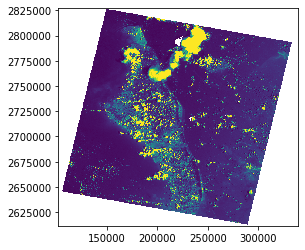

In [2]:
import rasterio
from rasterio.plot import show
dataset = rasterio.open('data/RGBA.byte.tif')
show(dataset)

In [5]:
### Dataset objects have bands and this example has a band count of 3
print(dataset.count)

### Data from a raster band can be accessed by the band’s index number.
### Following the GDAL convention, bands are indexed from 1.
print(dataset.indexes)

### Height and width of the image
print(dataset.width)
print(dataset.height)

### Bounding Box
print(dataset.bounds)

4
(1, 2, 3, 4)
791
718
BoundingBox(left=101985.0, bottom=2611485.0, right=339315.0, top=2826915.0)


In [6]:
### Read from a band
dataset.read(3)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

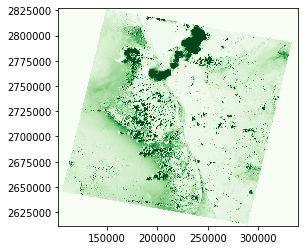

In [7]:
### Choose Band 2 and Colormap as Green
show((dataset, 2), cmap='Greens')

### Normalized Difference Vegetation Index


Normalized Difference Vegetation Index (NDVI) quantifies vegetation by measuring the difference between near-infrared (which vegetation strongly reflects) and red light (which vegetation absorbs).

It is used to vegetation index to assess the quality of vegetation within an area of interest



![](https://gisgeography.com/wp-content/uploads/2017/08/ndvi-example.jpg)

Normalized Difference Vegetation Index (NDVI), developed by a NASA scientist named Compton Tucker in 1977, is commonly used to assess whether an area contains live green vegetation or not. It can show the difference between water and plants, bare soil and grass, whether plants are under stress, and what lifecycle stage a crop is in.

It compares how much more near-infrared light is reflected by chlorophyll vs visible red light:


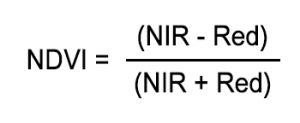

Decimation factor= 9


Text(0, 0.5, 'Row #')

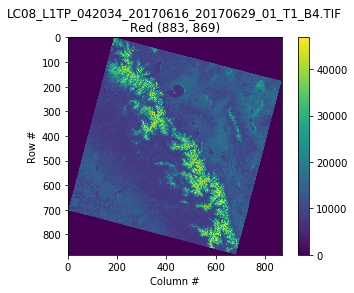

In [10]:
# Use the same example image:
import matplotlib.pyplot as plt
date = '2019-08-10'
url = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/'
redband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(4)
nirband = 'LC08_L1TP_042034_20170616_20170629_01_T1_B{}.TIF'.format(5)

with rasterio.open(url+redband) as src:
    profile = src.profile
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    print('Decimation factor= {}'.format(oview))
    red = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

plt.imshow(red)
plt.colorbar()
plt.title('{}\nRed {}'.format(redband, red.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

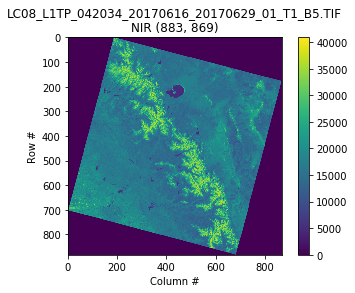

In [11]:
with rasterio.open(url+nirband) as src:
    oviews = src.overviews(1) # list of overviews from biggest to smallest
    oview = oviews[1]  # Use second-highest resolution overview
    nir = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))

plt.imshow(nir)
plt.colorbar()
plt.title('{}\nNIR {}'.format(nirband, nir.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

### Operations and Transformations

In [22]:
from osgeo import ogr

wkt1 = "POLYGON ((1208064.271243039 624154.6783778917, 1208064.271243039 601260.9785661874, 1231345.9998651114 601260.9785661874, 1231345.9998651114 624154.6783778917, 1208064.271243039 624154.6783778917))"
wkt2 = "POLYGON ((1199915.6662253144 633079.3410163528, 1199915.6662253144 614453.958118695, 1219317.1067437078 614453.958118695, 1219317.1067437078 633079.3410163528, 1199915.6662253144 633079.3410163528)))"

poly1 = ogr.CreateGeometryFromWkt(wkt1)
poly2 = ogr.CreateGeometryFromWkt(wkt2)

intersection = poly1.Intersection(poly2)

print(intersection.ExportToWkt())

POLYGON ((1208064.27124304 614453.958118695,1208064.27124304 624154.678377892,1219317.10674371 624154.678377892,1219317.10674371 614453.958118695,1208064.27124304 614453.958118695))


In [24]:
from osgeo import ogr
from osgeo import osr

source = osr.SpatialReference()
source.ImportFromEPSG(2927)

target = osr.SpatialReference()
target.ImportFromEPSG(4326)

transform = osr.CoordinateTransformation(source, target)

point = ogr.CreateGeometryFromWkt("POINT (1120351.57 741921.42)")
point.Transform(transform)

print( point.ExportToWkt())

POINT (-122.598135130878 47.3488013793486)


## Vector Data (OGR / GEOS)

In [25]:
import fiona
fiona.open('shp_file/map/map.shp')

<open Collection 'shp_file/map/map.shp:map', mode 'r' at 0x7f77b255e400>

In [26]:
### GEOMETRIES THAT MAKE UP THE SHAPEFILE

from fiona import collection

with collection("shp_file/map/map.shp", "r") as input:
    for f in input:
        print(f['geometry']['type'])

MultiPolygon
MultiPolygon
Polygon
MultiPolygon
Polygon
Polygon
Polygon
Polygon
MultiPolygon
Polygon
Polygon
MultiPolygon
Polygon
Polygon
Polygon
Polygon
Polygon
MultiPolygon
MultiPolygon
Polygon
MultiPolygon
Polygon
Polygon
Polygon
Polygon
MultiPolygon
MultiPolygon
Polygon
Polygon
Polygon
MultiPolygon
Polygon
Polygon
Polygon
MultiPolygon


In [27]:
import geopandas as gpd

fname = "https://gist.githubusercontent.com/wavded/1200773/raw/e122cf709898c09758aecfef349964a8d73a83f3/sample.json"

df = gpd.read_file(fname)

In [28]:
df

prop0             prop1                                       geometry
0  value0              None                                POINT (102 0.5)
1  value0          0.000000        LINESTRING (102 0, 103 1, 104 0, 105 1)
2  value0  {'this': 'that'}  POLYGON ((100 0, 101 0, 101 1, 100 1, 100 0))

POINT (102 0.5)


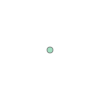

In [29]:
print(df['geometry'][0])
df['geometry'][0]

LINESTRING (102 0, 103 1, 104 0, 105 1)


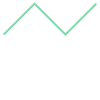

In [12]:
print(df['geometry'][1])
df['geometry'][1]

POLYGON ((100 0, 101 0, 101 1, 100 1, 100 0))


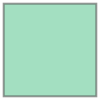

In [14]:
print(df['geometry'][2])
df['geometry'][2]

In [50]:
### POINT INSIDE A POLYGON ?
df['geometry'][0].within(df['geometry'][2])

False

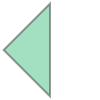

In [54]:
from shapely.geometry import MultiPoint
MultiPoint([(0, 0), (1, 1), (1, -1)]).convex_hull

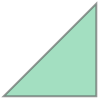

In [63]:
from shapely.ops import polygonize
lines = [
((0, 0), (1, 1)),
((0, 0), (0, 1)),
((0, 1), (1, 1)),
((1, 1), (1, 0)), 
((1, 0), (0, 0))]

p = list(polygonize(lines))
p[0]

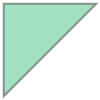

In [64]:
p[1]

In [70]:
from shapely.ops import triangulate
points = MultiPoint([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
triangles = triangulate(points)

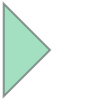

In [77]:
triangles[0]

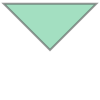

In [75]:
triangles[1]

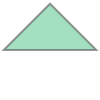

In [76]:
triangles[2]

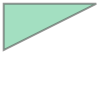

In [79]:
triangles[3]

## Visualization of spatial data

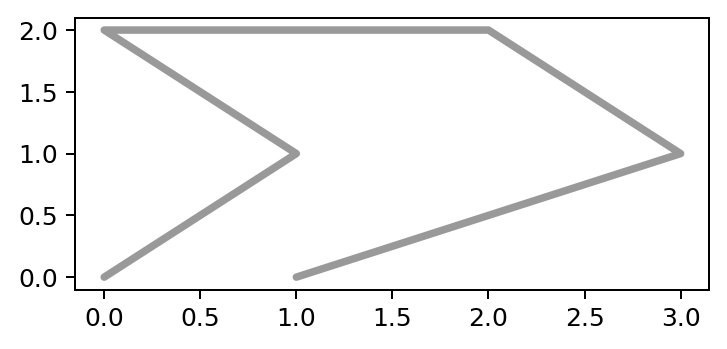

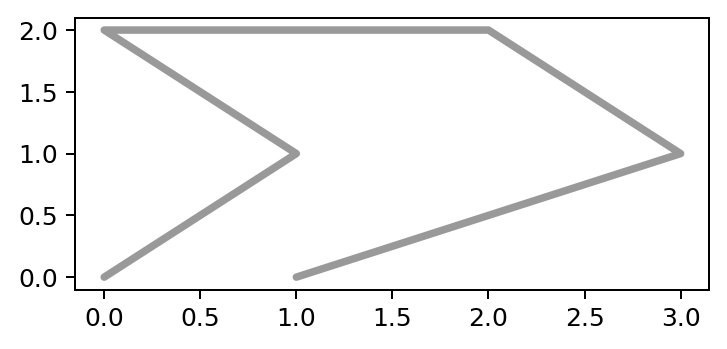

In [14]:
from matplotlib import pyplot
from shapely.geometry import LineString
from descartes import PolygonPatch

BLUE = '#6699cc'
GRAY = '#999999'

def plot_line(ax, ob):
    x, y = ob.xy
    ax.plot(x, y, color=GRAY, linewidth=3, solid_capstyle='round', zorder=1)

line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])

fig = pyplot.figure(1, figsize=(10, 2), dpi=180)

ax = fig.add_subplot(121)

plot_line(ax, line)
fig

### Folium (leaflet)

In [3]:
import folium
import pandas as pd

train_df = pd.DataFrame({'Latitude': [40.7145,40.7947,40.7388, 40.7539],
                         'Longitude':[ -73.9425 ,-73.9667 ,-74.0018 ,-73.9677 ]    })

map_osm = folium.Map(location=[40.742, -73.956], zoom_start=11)

train_df.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], 
                                              radius=10)
                                             .add_to(map_osm), axis=1)

map_osm

### Plotly + Mapbox

In [2]:
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## OSMNX (Spatial Networks)

In [3]:
import osmnx as ox
import networkx as nx
times_square = (40.758581, -73.985553)
G = ox.graph_from_point(times_square, distance=500)
# quick plot
ox.plot_graph(G, fig_height=10, fig_width=10)

<Figure size 1000x1000 with 1 Axes>

(<Figure size 1000x1000 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f26db3cd4e0>)

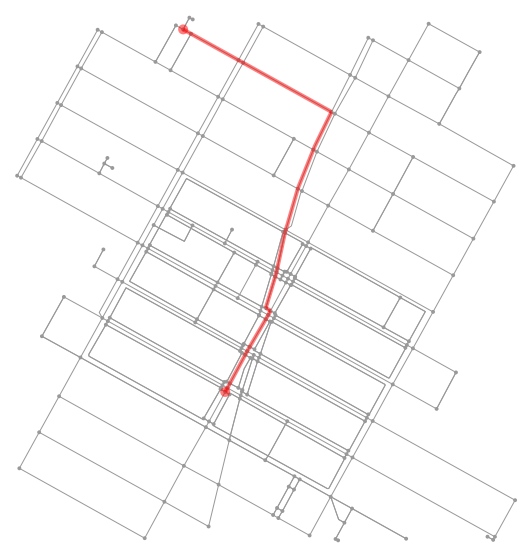

(<Figure size 720x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f26db4022e8>)

In [4]:
import numpy as np
route = nx.shortest_path(G, np.random.choice(G.nodes), 
                         np.random.choice(G.nodes))
ox.plot_graph_route(G, route, fig_height=10, fig_width=10)

In [5]:
import folium
graph_map = ox.plot_graph_folium(G, popup_attribute='name', edge_width=2)
m = ox.plot_route_folium(G, route, route_map=graph_map, popup_attribute='length')
m

## Rtree indexing (Soeed up )

In [15]:
import rtree

 OSM have Points of interest data is available through their overpass API which can be used for tons of geospatial analysis  

In [11]:
import geopandas as gpd
df = gpd.read_file('https://data.cityofnewyork.us/api/geospatial/rxuy-2muj?method=export&format=GeoJSON')

In [12]:
df[['name','geometry']].head()

name  \
0     14 AV OV BELT CROSS ISL PKWY   
1  UNION ST OVER LIRR PORT WASH BR   
2  149 ST BR OVR LIRR PORT WASH BR   
3              65 STREET OVER LIRR   
4  WOODSIDE AVE OVER CSX TRANSPORT   

                                       geometry  
0  POINT (-73.81678346994171 40.78815244048363)  
1  POINT (-73.82615714925024 40.75979346986441)  
2  POINT (-73.81611636010126 40.76254832987148)  
3  POINT (-73.90009437988503 40.74312734830433)  
4  POINT (-73.89208418942773 40.74291768983328)

In [13]:
df.shape[0]

19929

In [14]:
df_indexed = df.sindex
df_indexed

In [16]:
from shapely.geometry import box
polygon = box(-74.002190,40.736137,-73.979788,40.752589)
list(polygon.boundary.coords)

[(-73.979788, 40.736137),
 (-73.979788, 40.752589),
 (-74.00219, 40.752589),
 (-74.00219, 40.736137),
 (-73.979788, 40.736137)]

### With Indexing

First we have our GeoDataFrame (called gdf) create an R-tree spatial index for its geometry. Then we intersect this index with the bounding box of our polygon. This returns a set of possible matches. That is, there are no false negatives but there may be some false positives if an R-tree rectangle within the city border’s bounding box contains some points outside the city border

Finally, to identify the precise matches (those points exactly within our polygon), we intersect the possible matches with the polygon itself:

In [21]:
%%time
possible_matches_index = list(df_indexed.intersection(polygon.bounds))
possible_matches = df.iloc[possible_matches_index]
print(possible_matches.shape[0])
precise_matches = possible_matches[possible_matches.intersects(polygon)]
print(precise_matches.shape[0])

290
290
CPU times: user 10.7 ms, sys: 4.25 ms, total: 14.9 ms
Wall time: 12.4 ms


### Without indexing

In [22]:
%%time
data_in_polygon = df[df["geometry"].apply(lambda x: x.within(polygon))]
data_in_polygon.shape[0]

CPU times: user 103 ms, sys: 132 µs, total: 103 ms
Wall time: 100 ms


290

### Indexing is always much Faster

In [23]:
100 / 12.4

8.064516129032258

### Plot it on a map to verify the results

In [122]:
gjson = precise_matches.to_crs(epsg='4326').to_json()
import folium

mapa = folium.Map([40.74963516566866,-74.00156389477165],
                  zoom_start=15,
                  tiles='cartodbpositron')

points = folium.features.GeoJson(gjson)

folium.GeoJson(polygon).add_to(mapa)

mapa.add_children(points)
mapa